# **DATA LOADING**

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Cardiotocographic.csv")

# Display the first few rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# **DATA CLEANING AND PREPARATION**

In [41]:
# Check how many missing values there are in each column
print("Missing Values:/n")

df.isnull().sum()

# Show the data types of each column and the count of non-null values
df.info()

# Fill in missing values for numbers with the median value of each column
df = df.fillna(df.median(numeric_only=True))

# Try to convert columns with text data to numbers if possible
# If the conversion fails, it will turn those values into NaN (missing values)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any new missing values (from the failed conversions) with the median again
df = df.fillna(df.median(numeric_only=True))
print("Missing values after cleaning:\n", df.isnull().sum())


Missing Values:/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
Missing values after cleaning:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency

# **HANDLE MISSING VALUES AND DATA TYPES**

In [37]:
# Fill missing values in numeric columns with the median of each column
df = df.fillna(df.median(numeric_only=True))

# Convert any object-type columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# **DETECTION AND HANDLING OF OUTLIERS**

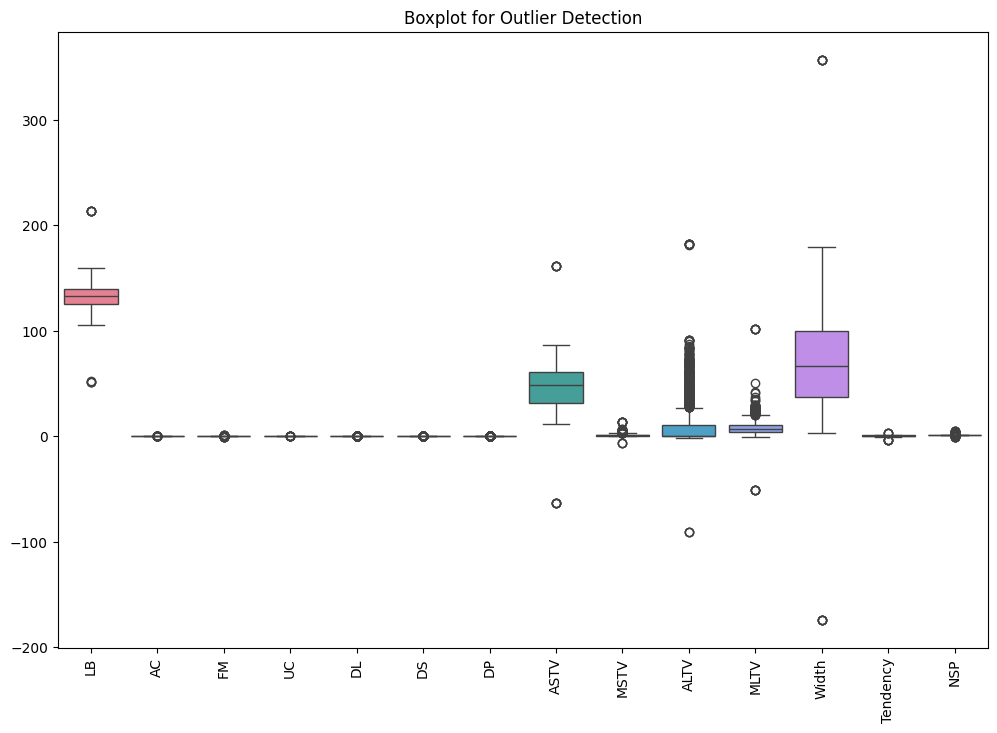

In [38]:
# Make the chart bigger so it’s easier to see
plt.figure(figsize=(12, 8))

# Create a boxplot for all number columns to look for outliers (unusual values)
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))

# Turn the names on the x-axis sideways so they don’t overlap
plt.xticks(rotation=90)

# Add a title at the top of the chart
plt.title('Boxplot for Outlier Detection')

# Show the chart
plt.show()

# **OUTLIERS TREATMENT**

Outliers have been capped using the IQR method.


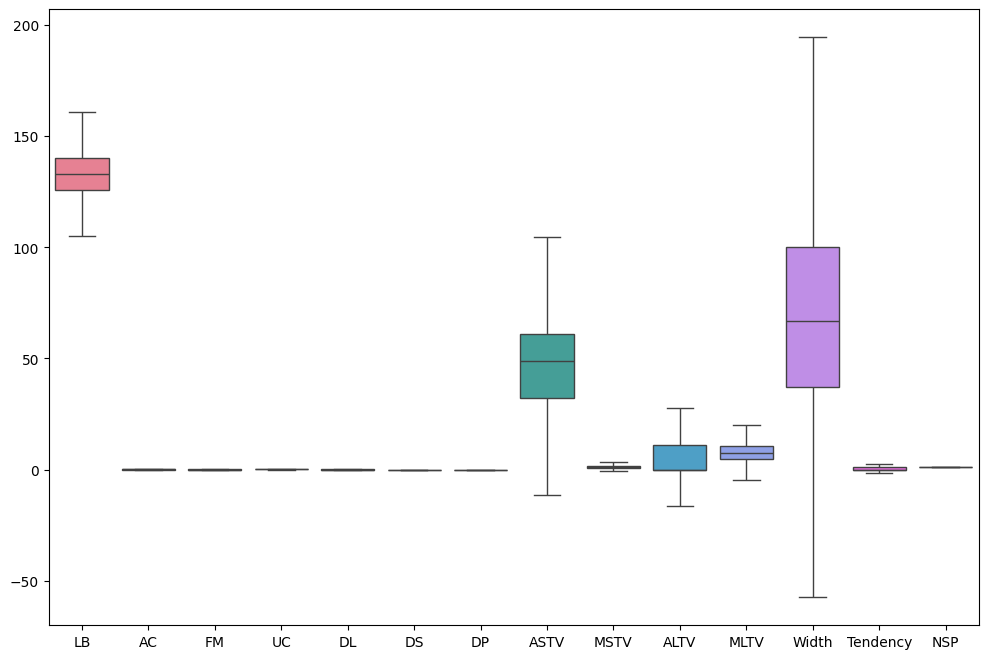

In [42]:
# OUTLIER TREATMENT USING IQR METHOD

# Function to cap outliers using the Interquartile Range (IQR) method
def cap_outliers_iqr(column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for acceptable data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

# Select only numeric columns (int and float types) from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the outlier capping function to each numeric column
for col in numeric_columns:
    cap_outliers_iqr(col)

print("Outliers have been capped using the IQR method.")

# Plot a boxplot to visualize the distribution of numeric features after outlier treatment
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))  # Create boxplots for numeric columns
plt.show()


# **STATISTICAL SUMMARY**

In [24]:
# Get basic stats for numeric columns and flip rows/columns
summary = df.describe().T

# Add the median value for each column
summary['median'] = df.median()

# Add the interquartile range (Q3 - Q1) for each column
summary['iqr'] = df.quantile(0.75) - df.quantile(0.25)

# Show selected summary stats including IQR
print(summary[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'iqr']])


                mean      median        std         min         25%  \
LB        133.290331  133.000000   9.930268  105.000000  126.000000   
AC          0.003132    0.001634   0.003828   -0.008409    0.000000   
FM          0.001568    0.000000   0.002485   -0.003850    0.000000   
UC          0.004362    0.004484   0.003001   -0.005177    0.001851   
DL          0.001770    0.000000   0.002668   -0.004934    0.000000   
DS          0.000000    0.000000   0.000000    0.000000    0.000000   
DP          0.000000    0.000000   0.000000    0.000000    0.000000   
ASTV       46.981873   49.000000  17.612745  -11.500000   32.000000   
MSTV        1.304644    1.200000   0.781091   -0.800000    0.700000   
ALTV        6.691678    0.000000  10.378400  -16.500000    0.000000   
MLTV        8.007471    7.400000   5.047078   -4.700000    4.600000   
Width      70.287203   67.000000  39.571995  -57.500000   37.000000   
Tendency    0.316537    0.000000   0.622406   -1.500000    0.000000   
NSP   

# **DATA VISUALIZATON**

# 1. **HISTOGRAMS**

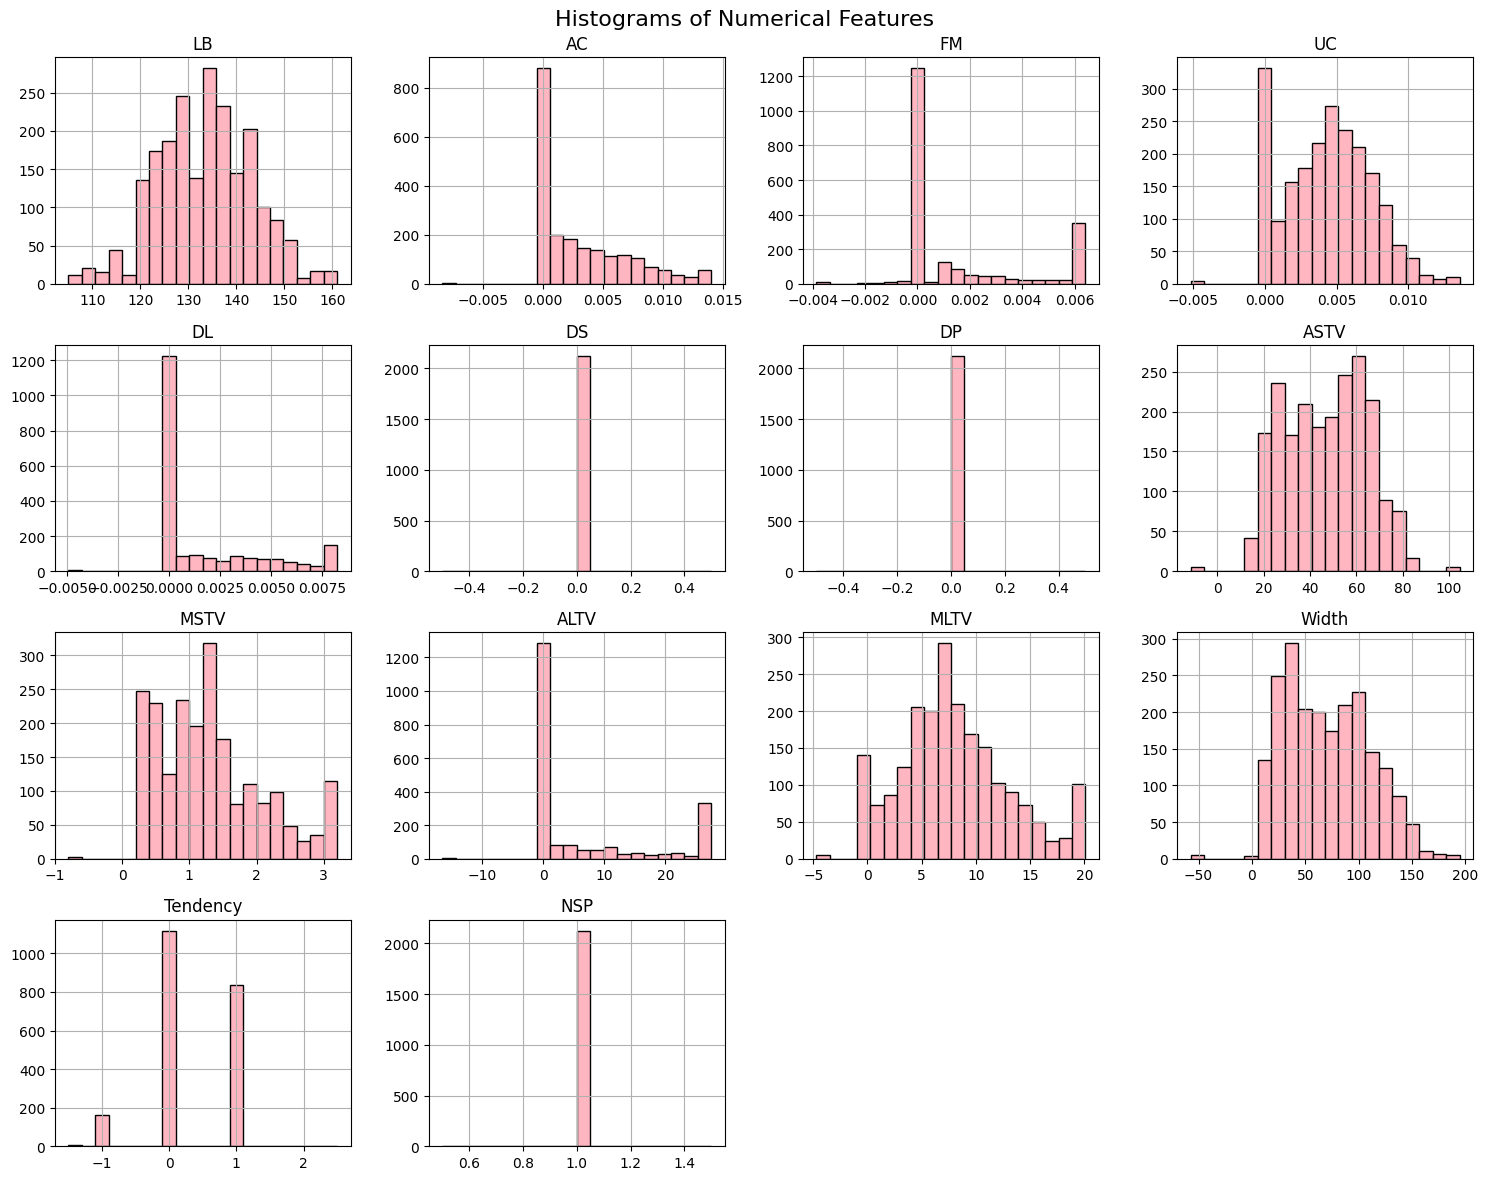

In [25]:
# Customized color; optional
pink = '#FFB6C1'

# Get the names of all number columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms to see the distribution (spread) of values in each number column
df[numerical_cols].hist(figsize=(15, 12), bins=20, edgecolor='black', color=pink)

# Add a title at the top of all histograms
plt.suptitle('Histograms of Numerical Features', fontsize=16)

# Adjust spacing so nothing overlaps
plt.tight_layout()

# Show the histograms
plt.show()


# **2. BOXPLOTS**

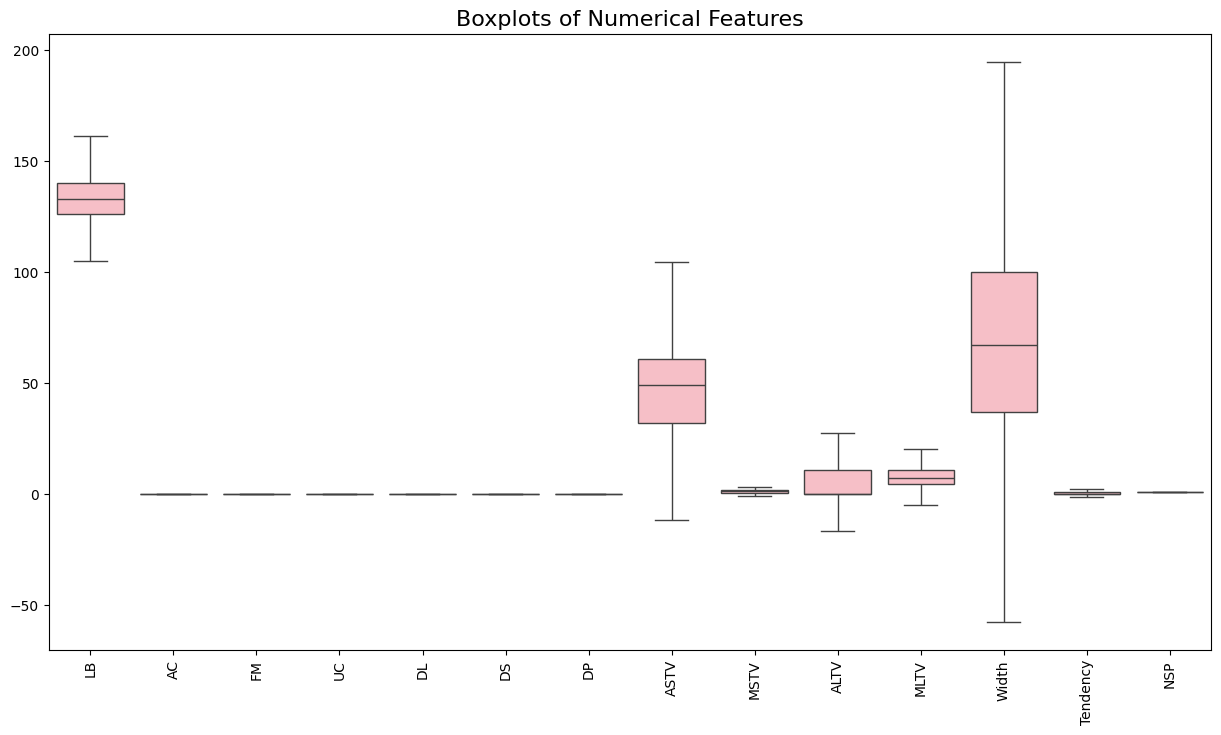

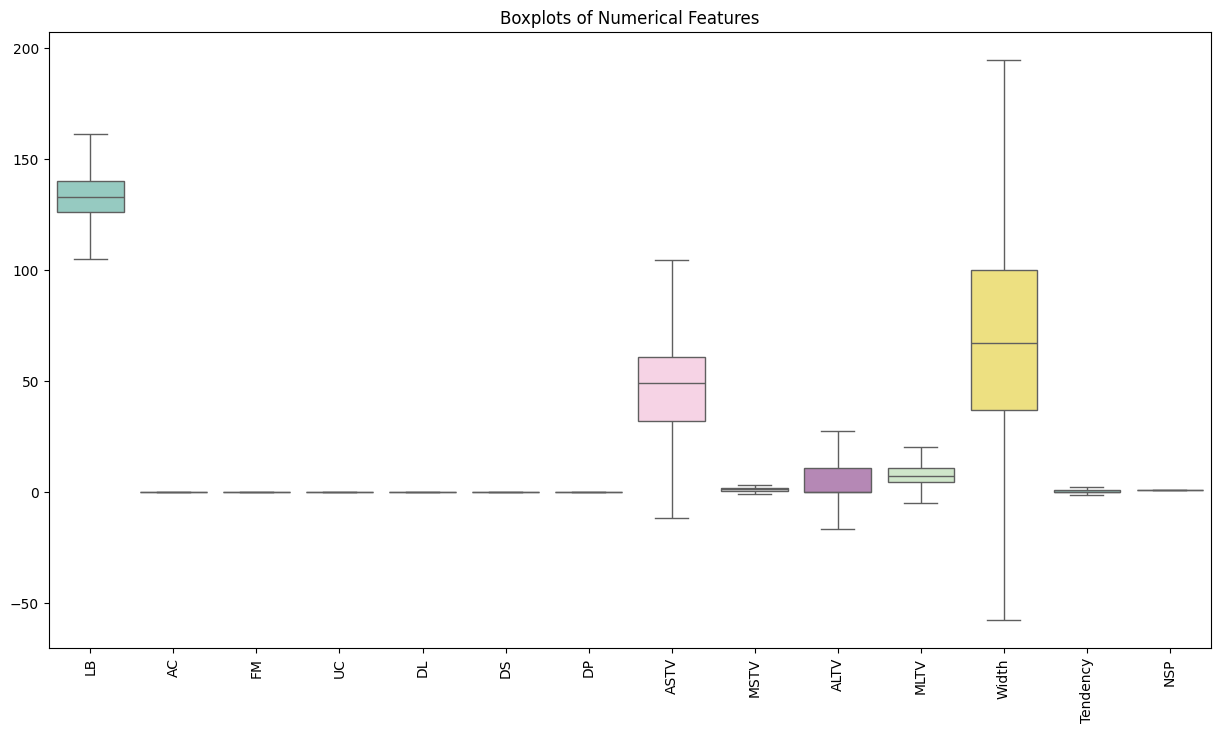

In [26]:
# Set the pink color for the boxplot
pink = '#FFB6C1'

# Make a bigger figure for the boxplot
plt.figure(figsize=(15, 8))

# Draw boxplots for all number columns using pink color
sns.boxplot(data=df[numerical_cols], color=pink)

# Add a title to the plot
plt.title('Boxplots of Numerical Features', fontsize=16)

# Turn x-axis labels to the side so they don’t overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Now use a different set of colors (a built-in color palette)
plt.figure(figsize=(15, 8))

# Draw the same boxplots with a colorful palette
sns.boxplot(data=df[numerical_cols], palette="Set3")

# Add a title to the plot
plt.title('Boxplots of Numerical Features')

# Rotate x-axis labels again
plt.xticks(rotation=90)

# Show the second plot
plt.show()

# **3. Pair Plot on Selected Features**

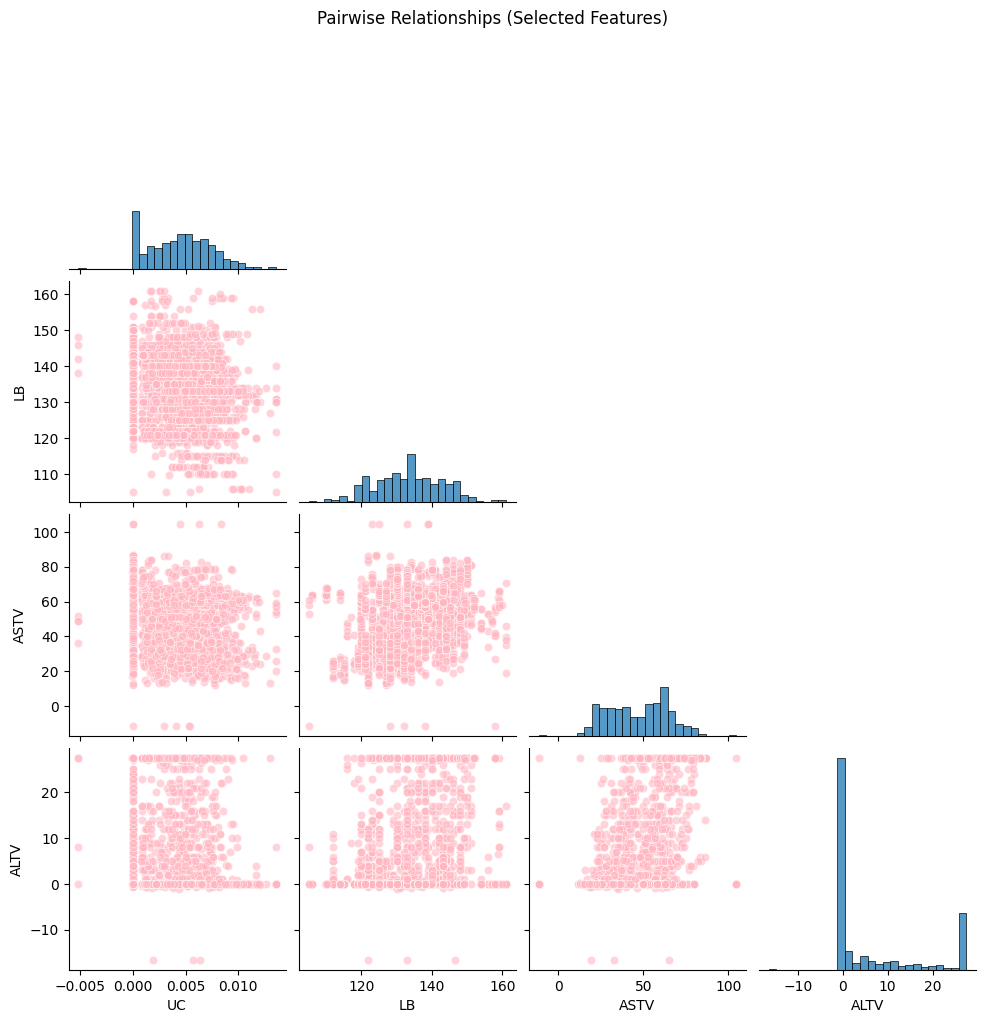

In [27]:
# Create a pairplot to show relationships between selected numerical features 'UC', 'LB', 'ASTV', 'ALTV'
sns.pairplot(df[['UC', 'LB', 'ASTV', 'ALTV']], corner=True, plot_kws={'alpha': 0.6, 'color': pink})

# Set the title for the entire plot and adjust its position using 'y'
plt.suptitle('Pairwise Relationships (Selected Features)', y=1.02)

# Show the plot
plt.show()


# **4. Violin Plots**

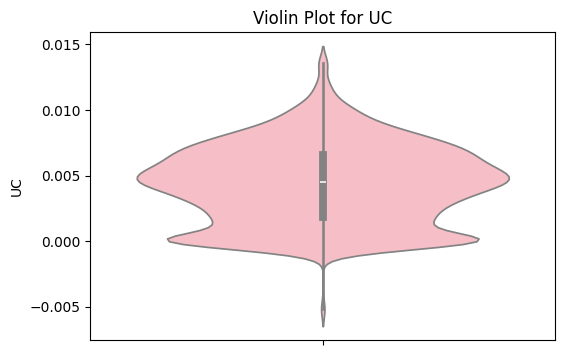

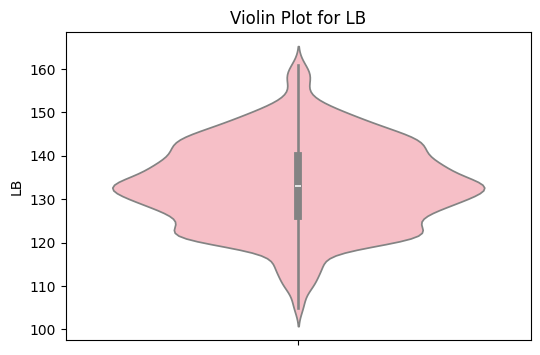

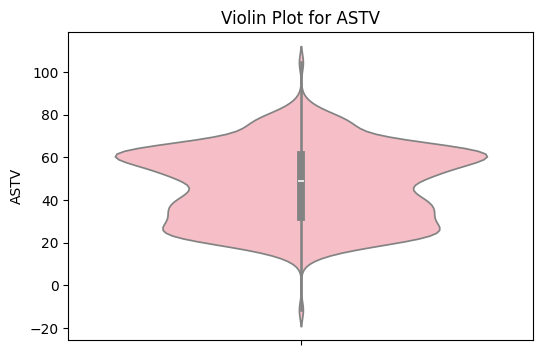

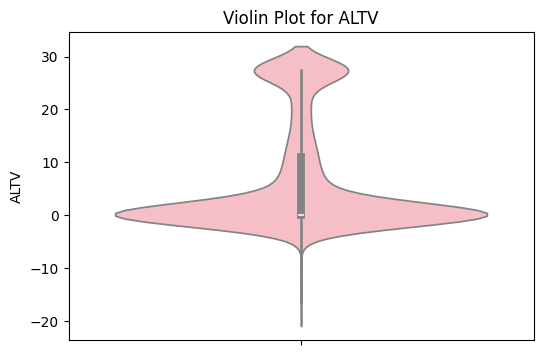

In [28]:
# Loop through each selected column to create individual violin plots
for col in ['UC', 'LB', 'ASTV', 'ALTV']:
    # Set the size of the plot
    plt.figure(figsize=(6, 4))

    # Create a violin plot for the current column
    # A violin plot shows the distribution of the data and highlights the median and spread
    sns.violinplot(data=df, y=col, color=pink)

    # Set the title of the plot to indicate which feature is being shown
    plt.title(f'Violin Plot for {col}')

    # Display the plot
    plt.show()



# **5. Pattern Recognition and Correlation Analysis**

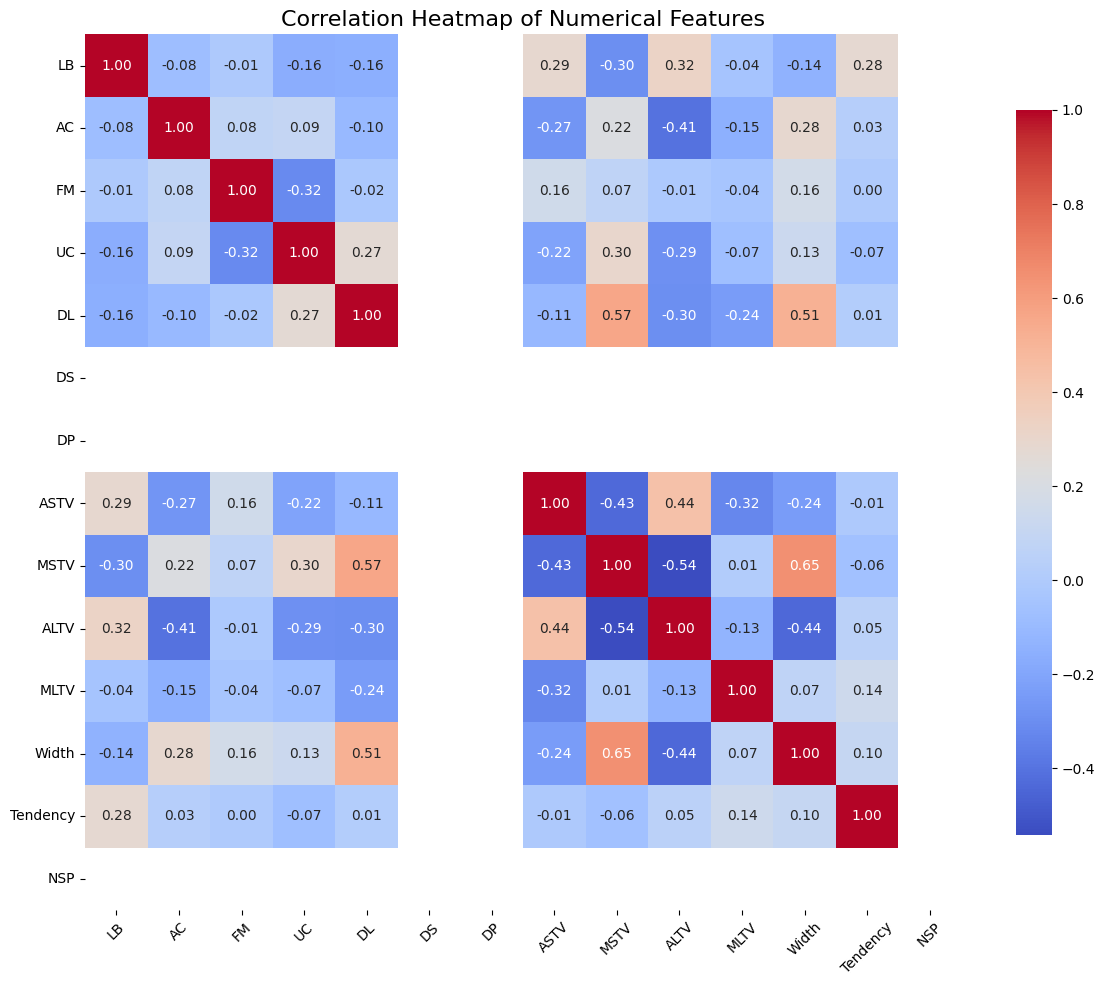

In [29]:
# Calculate the correlation matrix for numerical columns only
# Correlation tells us how strongly two numerical features are related (values range from -1 to 1)
corr_matrix = df.corr(numeric_only=True)

# Set the figure size for the heatmap (width=12, height=10)
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
# - annot=True shows the correlation values inside the boxes
# - cmap='coolwarm' gives a nice color gradient from blue to red
# - fmt=".2f" means we show the numbers with 2 decimal places
# - square=True makes each cell square-shaped
# - cbar_kws controls the color bar appearance
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Add a title to the heatmap
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Keep y-axis labels straight
plt.yticks(rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()




# **CONCLUSION**

**Key Insights**

There is a strong positive correlation between LB (Baseline Fetal Heart Rate) and AC (Accelerations). This may suggest that when the baseline heart rate is stable or within healthy range, fetal movements (accelerations) are more frequent.

Features such as ASTV (Percentage of time with abnormal short-term variability) and ALTV (Long-term variability) show distinctive distributions, which might help in differentiating normal and abnormal fetal conditions.

Some variables (e.g., UC - Uterine Contractions) show skewed distributions, possibly indicating extreme or rare events, which could be important for further risk-based stratification.

**Implications**

The positive association between LB and AC aligns with clinical expectations, where fetal accelerations typically reflect a healthy and responsive fetus.

The presence of outliers (observed in boxplots and violin plots) might be linked to atypical or high-risk pregnancies and may require clinical follow-up.

These patterns could be used to build predictive models for fetal health classification (e.g., normal, suspect, pathologic).